In [27]:
import pandas as pd
import numpy as np

In [28]:
data = pd.read_csv('smerahputih_oneforall.csv')

In [29]:
data

,publishedAt,authorDisplayName,textDisplay,likeCount,type
0,2025-08-28T08:45:34Z,@SyafeQah1990,Cartoon ni masuk pawagam...??..,0,comment
1,2025-08-28T08:29:35Z,@HusnaNurul-m6h,ini yg katanya film mengeluarkan dan sampe mil...,0,comment
2,2025-08-28T08:14:10Z,@AlvinoAWP,Burung.nya.suara.monyet.cok🗿🗿,0,comment
3,2025-08-28T07:56:15Z,@arkanpradipta8934,"<a href=""https://www.youtube.com/watch?v=6jdG2...",0,comment
4,2025-08-28T07:50:36Z,@galangadimaskhrisnaherlamb4053,bahkan jurasik park 1993 lebih bagus dari ini,1,comment
...,...,...,...,...,...
4751,2025-08-11T08:57:24Z,@prod.starlight,​@@JustAnOrd1naryMankok XXI gaada trailer sih?...,6,reply
4752,2025-08-15T09:15:28Z,@dikaalvin657,Kalau fulus<br>Pasti mulus<br>😂😂😂,2,reply
4753,2025-08-15T23:23:43Z,@matthewbrealey2026,@@prod.starlight masuk di XXI loh,0,reply
4754,2025-08-09T04:07:03Z,@robbycarnando4512,Pengisi suara ny spa aj yahhh...,1,comment


In [30]:
data['publishedAt'] = pd.to_datetime(data['publishedAt'])
data['date'] = data['publishedAt'].dt.date
data['hour'] = data['publishedAt'].dt.hour

In [31]:
data.isna().sum()

publishedAt          0
authorDisplayName    0
textDisplay          0
likeCount            0
type                 0
date                 0
hour                 0
dtype: int64

In [33]:
data.duplicated().sum()

np.int64(2)

In [34]:
data.drop_duplicates(inplace=True)

In [35]:
data[data.duplicated(subset='textDisplay')]

,publishedAt,authorDisplayName,textDisplay,likeCount,type,date,hour
47,2025-08-27 14:08:06+00:00,@Yoiki_kolip,Bajet miliarran grafik 80 an,0,comment,2025-08-27,14
234,2025-08-25 14:38:04+00:00,@kutufilem,itu mau peramg apa gimana kok ada ak47 di gudang,0,comment,2025-08-25,14
254,2025-08-25 12:24:33+00:00,@VioVirza,"<a href=""https://www.youtube.com/watch?v=6jdG2...",0,reply,2025-08-25,12
323,2025-08-24 21:22:28+00:00,@JuraganGabah-m8b,👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎,0,comment,2025-08-24,21
407,2025-08-24 07:08:29+00:00,@Supplyoverload,Burik,0,comment,2025-08-24,7
...,...,...,...,...,...,...,...
4624,2025-08-11 06:20:58+00:00,@iujenongg,"Bakalan abis tiket bioskop nya nanti, mengalah...",1,comment,2025-08-11,6
4635,2025-08-16 10:33:31+00:00,@Azkaalfaizi-d4n,😂😂,0,reply,2025-08-16,10
4645,2025-08-10 05:28:21+00:00,@dutsukodutsu6117,😂😂😂😂,0,comment,2025-08-10,5
4660,2025-08-09 23:18:36+00:00,@AgeGabut,Wtf,0,comment,2025-08-09,23


In [37]:
data.drop_duplicates(subset='textDisplay', keep='first', inplace=True)

In [38]:
data.shape

(4640, 7)

In [ ]:
text = ' '.join(data['textDisplay'])

# **WordCloud sebelum preprocessing**

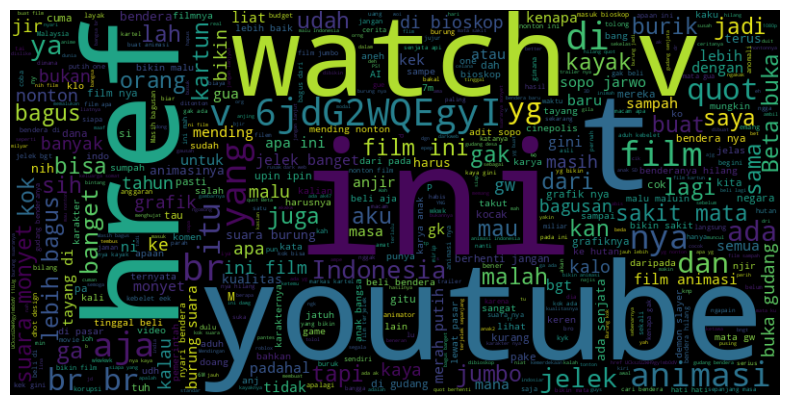

In [40]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

data['textDisplay'] = data['textDisplay'].fillna('')

text = ' '.join(data['textDisplay'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

wc = WordCloud(stopwords=stopwords, background_color='black', max_words=500, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

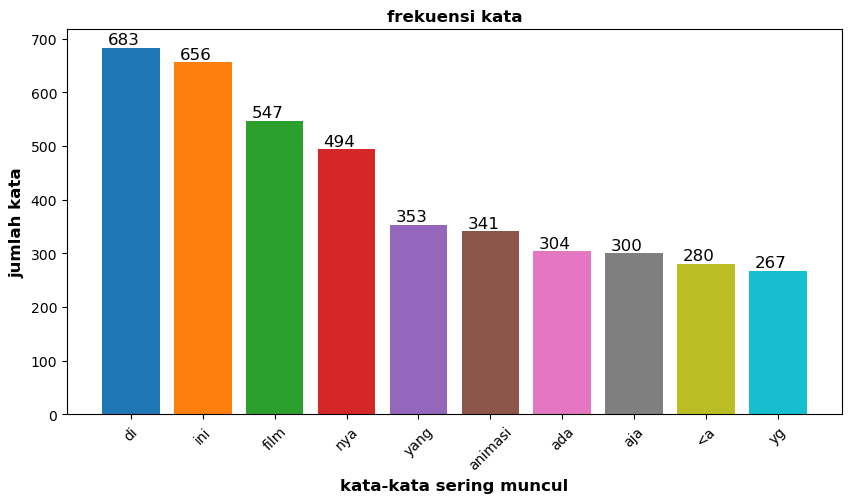

In [42]:
from collections import Counter

text = ' '.join(data['textDisplay'])

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)

word, count = zip(*top_words)


colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(10, 5))
bars = plt.bar(word, count, color=colors)
plt.xlabel('kata-kata sering muncul', fontsize=12, fontweight='bold')
plt.ylabel('jumlah kata', fontsize=12, fontweight='bold')
plt.title('frekuensi kata', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)


for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center', va='bottom')
    
    
plt.show()

In [11]:
import re
import string
import nltk
import html

def remove_url(tweet):
    if tweet is not None and isinstance(tweet, str):
        url = re.compile(r'https?://\S+|www\.\S+')
        return url.sub(f'', tweet)
    else:
        return tweet
    
def remove_html(tweet):
    if tweet is not None and isinstance(tweet, str):
        # hapus tag html
        html_pattern = re.compile(r'<.*?>')
        cleaned_tweet = html_pattern.sub(r'', tweet)
        
        # Langkah 2: Dekode entitas HTML (misalnya &quot; menjadi ")
        cleaned_tweet = html.unescape(cleaned_tweet)

        # Ganti tanda titik dengan spasi
        cleaned_tweet = cleaned_tweet.replace('.', ' ')

        # Hapus tanda baca lainnya
        punctuation_pattern = re.compile(f"[{re.escape(string.punctuation)}]")
        cleaned_tweet = punctuation_pattern.sub(r'', cleaned_tweet)
        
        return cleaned_tweet
    else:
        return tweet
    
    
def remove_emoji(tweet):
    if tweet is not None and isinstance(tweet, str):
        emoji_pattern = re.compile(
            "["
            "\U0001F600-\U0001F64F"  # emoticons
            "\U0001F300-\U0001F5FF"  # symbols & pictographs
            "\U0001F680-\U0001F6FF"  # transport & map symbols
            "\U0001F700-\U0001F77F"  # alchemical symbols
            "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
            "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
            "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
            "\U0001FA00-\U0001FA6F"  # Chess Symbols
            "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
            "\U00002702-\U000027B0"  # Additional emoticons (Dingbats)
            "\U000024C2-\U0001F251"  # Miscellaneous Symbols and Pictographs
            "\U0001F1E0-\U0001F1FF"  # flags (iOS)
            "]+", flags=re.UNICODE)
        
        return emoji_pattern.sub(r'', tweet)
    else:
        return tweet
    
def remove_symbols(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
    return tweet

def remove_numbers(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'\d', '', tweet)
    return tweet

def remove_hastag(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'#\w+', '', tweet).strip()
    return tweet

data['text_cleaned'] = data['textDisplay'].apply(lambda x: remove_html(x))
data['text_cleaned'] = data['text_cleaned'].apply(lambda x: remove_url(x))
data['text_cleaned'] = data['text_cleaned'].apply(lambda x: remove_hastag(x))
data['text_cleaned'] = data['text_cleaned'].apply(lambda x: remove_symbols(x))
data['text_cleaned'] = data['text_cleaned'].apply(lambda x: remove_emoji(x))
data['text_cleaned'] = data['text_cleaned'].apply(lambda x: remove_numbers(x))

In [12]:
# clean data kolom authordisplayname
def clean_text(name):
    name = re.sub(r'^@', '', name)
    name = name.lower()
    return name

data['username'] = data['authorDisplayName'].apply(clean_text)

In [13]:
data

,publishedAt,authorDisplayName,textDisplay,likeCount,type,date,hour,text_cleaned,username
0,2025-08-28 08:45:34+00:00,@SyafeQah1990,Cartoon ni masuk pawagam...??..,0,comment,2025-08-28,8,Cartoon ni masuk pawagam,syafeqah1990
1,2025-08-28 08:29:35+00:00,@HusnaNurul-m6h,ini yg katanya film mengeluarkan dan sampe mil...,0,comment,2025-08-28,8,ini yg katanya film mengeluarkan dan sampe mil...,husnanurul-m6h
2,2025-08-28 08:14:10+00:00,@AlvinoAWP,Burung.nya.suara.monyet.cok🗿🗿,0,comment,2025-08-28,8,Burung nya suara monyet cok,alvinoawp
3,2025-08-28 07:56:15+00:00,@arkanpradipta8934,"<a href=""https://www.youtube.com/watch?v=6jdG2...",0,comment,2025-08-28,7,apalah ada AMK M,arkanpradipta8934
4,2025-08-28 07:50:36+00:00,@galangadimaskhrisnaherlamb4053,bahkan jurasik park 1993 lebih bagus dari ini,1,comment,2025-08-28,7,bahkan jurasik park lebih bagus dari ini,galangadimaskhrisnaherlamb4053
...,...,...,...,...,...,...,...,...,...
4751,2025-08-11 08:57:24+00:00,@prod.starlight,​@@JustAnOrd1naryMankok XXI gaada trailer sih?...,6,reply,2025-08-11,8,JustAnOrdnaryMankok XXI gaada trailer sih Gama...,prod.starlight
4752,2025-08-15 09:15:28+00:00,@dikaalvin657,Kalau fulus<br>Pasti mulus<br>😂😂😂,2,reply,2025-08-15,9,Kalau fulusPasti mulus,dikaalvin657
4753,2025-08-15 23:23:43+00:00,@matthewbrealey2026,@@prod.starlight masuk di XXI loh,0,reply,2025-08-15,23,prod starlight masuk di XXI loh,matthewbrealey2026
4754,2025-08-09 04:07:03+00:00,@robbycarnando4512,Pengisi suara ny spa aj yahhh...,1,comment,2025-08-09,4,Pengisi suara ny spa aj yahhh,robbycarnando4512


In [14]:
# case folding -> mengubad data menjadi huruf kecil semua
def case_folding(text):
    if isinstance(text, str):
        lowercase_text = text.lower()
        return lowercase_text
    else:
        return text
    
data['case_folding'] = data['text_cleaned'].apply(case_folding)

In [15]:
data

,publishedAt,authorDisplayName,textDisplay,likeCount,type,date,hour,text_cleaned,username,case_folding
0,2025-08-28 08:45:34+00:00,@SyafeQah1990,Cartoon ni masuk pawagam...??..,0,comment,2025-08-28,8,Cartoon ni masuk pawagam,syafeqah1990,cartoon ni masuk pawagam
1,2025-08-28 08:29:35+00:00,@HusnaNurul-m6h,ini yg katanya film mengeluarkan dan sampe mil...,0,comment,2025-08-28,8,ini yg katanya film mengeluarkan dan sampe mil...,husnanurul-m6h,ini yg katanya film mengeluarkan dan sampe mil...
2,2025-08-28 08:14:10+00:00,@AlvinoAWP,Burung.nya.suara.monyet.cok🗿🗿,0,comment,2025-08-28,8,Burung nya suara monyet cok,alvinoawp,burung nya suara monyet cok
3,2025-08-28 07:56:15+00:00,@arkanpradipta8934,"<a href=""https://www.youtube.com/watch?v=6jdG2...",0,comment,2025-08-28,7,apalah ada AMK M,arkanpradipta8934,apalah ada amk m
4,2025-08-28 07:50:36+00:00,@galangadimaskhrisnaherlamb4053,bahkan jurasik park 1993 lebih bagus dari ini,1,comment,2025-08-28,7,bahkan jurasik park lebih bagus dari ini,galangadimaskhrisnaherlamb4053,bahkan jurasik park lebih bagus dari ini
...,...,...,...,...,...,...,...,...,...,...
4751,2025-08-11 08:57:24+00:00,@prod.starlight,​@@JustAnOrd1naryMankok XXI gaada trailer sih?...,6,reply,2025-08-11,8,JustAnOrdnaryMankok XXI gaada trailer sih Gama...,prod.starlight,justanordnarymankok xxi gaada trailer sih gama...
4752,2025-08-15 09:15:28+00:00,@dikaalvin657,Kalau fulus<br>Pasti mulus<br>😂😂😂,2,reply,2025-08-15,9,Kalau fulusPasti mulus,dikaalvin657,kalau fuluspasti mulus
4753,2025-08-15 23:23:43+00:00,@matthewbrealey2026,@@prod.starlight masuk di XXI loh,0,reply,2025-08-15,23,prod starlight masuk di XXI loh,matthewbrealey2026,prod starlight masuk di xxi loh
4754,2025-08-09 04:07:03+00:00,@robbycarnando4512,Pengisi suara ny spa aj yahhh...,1,comment,2025-08-09,4,Pengisi suara ny spa aj yahhh,robbycarnando4512,pengisi suara ny spa aj yahhh


In [16]:
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replace_words = []
        kalimat_baku = []
        kata_ganti = []
        kata_tidak_baku_hash = []
        
        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replace_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_ganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
            else:
                replace_words.append(word)
            
        replaced_text = ' '.join(replace_words)
    else:
        replaced_text = ''
        kalimat_baku = []
        kata_ganti = []
        kata_tidak_baku_hash = []
        
    return replaced_text, kalimat_baku, kata_ganti, kata_tidak_baku_hash

data = pd.DataFrame(data[['date','hour','username','likeCount' ,'text_cleaned', 'case_folding']])

In [17]:
data

,date,hour,username,likeCount,text_cleaned,case_folding
0,2025-08-28,8,syafeqah1990,0,Cartoon ni masuk pawagam,cartoon ni masuk pawagam
1,2025-08-28,8,husnanurul-m6h,0,ini yg katanya film mengeluarkan dan sampe mil...,ini yg katanya film mengeluarkan dan sampe mil...
2,2025-08-28,8,alvinoawp,0,Burung nya suara monyet cok,burung nya suara monyet cok
3,2025-08-28,7,arkanpradipta8934,0,apalah ada AMK M,apalah ada amk m
4,2025-08-28,7,galangadimaskhrisnaherlamb4053,1,bahkan jurasik park lebih bagus dari ini,bahkan jurasik park lebih bagus dari ini
...,...,...,...,...,...,...
4751,2025-08-11,8,prod.starlight,6,JustAnOrdnaryMankok XXI gaada trailer sih Gama...,justanordnarymankok xxi gaada trailer sih gama...
4752,2025-08-15,9,dikaalvin657,2,Kalau fulusPasti mulus,kalau fuluspasti mulus
4753,2025-08-15,23,matthewbrealey2026,0,prod starlight masuk di XXI loh,prod starlight masuk di xxi loh
4754,2025-08-09,4,robbycarnando4512,1,Pengisi suara ny spa aj yahhh,pengisi suara ny spa aj yahhh


In [18]:
kamus_data = pd.read_csv('kamuskatabaku.csv')
kamus_tidak_baku_dict = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

In [19]:
data[['normalisasi', 'kata_baku', 'kata_tidak_baku', 'kata_tidak_baku_hash']] = data['case_folding'].apply(lambda x:pd.Series(replace_taboo_words(x, kamus_tidak_baku_dict)))

In [20]:
data

,date,hour,username,likeCount,text_cleaned,case_folding,normalisasi,kata_baku,kata_tidak_baku,kata_tidak_baku_hash
0,2025-08-28,8,syafeqah1990,0,Cartoon ni masuk pawagam,cartoon ni masuk pawagam,cartoon ini masuk pawagam,[ini],[ni],[2456318346048184544]
1,2025-08-28,8,husnanurul-m6h,0,ini yg katanya film mengeluarkan dan sampe mil...,ini yg katanya film mengeluarkan dan sampe mil...,ini yang katanya film mengeluarkan dan sampai ...,"[yang, sampai, kaku, grafik, menonton, film, m...","[yg, sampe, kaku, garfik, nonton, filem, nonto...","[7000057057920846064, 7174477412075851421, -79..."
2,2025-08-28,8,alvinoawp,0,Burung nya suara monyet cok,burung nya suara monyet cok,burung ya suara monyet cok,"[ya, cok]","[nya, cok]","[-3835190235622925646, 6289235406561192807]"
3,2025-08-28,7,arkanpradipta8934,0,apalah ada AMK M,apalah ada amk m,apalah ada amk sama,[sama],[m],[-300760810988659368]
4,2025-08-28,7,galangadimaskhrisnaherlamb4053,1,bahkan jurasik park lebih bagus dari ini,bahkan jurasik park lebih bagus dari ini,bahkan jurasik park lebih bagus dari ini,[],[],[]
...,...,...,...,...,...,...,...,...,...,...
4751,2025-08-11,8,prod.starlight,6,JustAnOrdnaryMankok XXI gaada trailer sih Gama...,justanordnarymankok xxi gaada trailer sih gama...,justanordnarymankok xxi trailer sih gamasuk xx...,[],[],[]
4752,2025-08-15,9,dikaalvin657,2,Kalau fulusPasti mulus,kalau fuluspasti mulus,kalau fuluspasti mulus,[],[],[]
4753,2025-08-15,23,matthewbrealey2026,0,prod starlight masuk di XXI loh,prod starlight masuk di xxi loh,prod starlight masuk di xxi loh,[],[],[]
4754,2025-08-09,4,robbycarnando4512,1,Pengisi suara ny spa aj yahhh,pengisi suara ny spa aj yahhh,pengisi suara nya spa saja ya,"[nya, saja, ya]","[ny, aj, yahhh]","[-3047791022580838461, 4546866810800654091, -6..."


In [21]:
def tokenize(text):
    tokens = text.split()
    return tokens

data['tokenize'] = data['normalisasi'].apply(tokenize)

data

,date,hour,username,likeCount,text_cleaned,case_folding,normalisasi,kata_baku,kata_tidak_baku,kata_tidak_baku_hash,tokenize
0,2025-08-28,8,syafeqah1990,0,Cartoon ni masuk pawagam,cartoon ni masuk pawagam,cartoon ini masuk pawagam,[ini],[ni],[2456318346048184544],"[cartoon, ini, masuk, pawagam]"
1,2025-08-28,8,husnanurul-m6h,0,ini yg katanya film mengeluarkan dan sampe mil...,ini yg katanya film mengeluarkan dan sampe mil...,ini yang katanya film mengeluarkan dan sampai ...,"[yang, sampai, kaku, grafik, menonton, film, m...","[yg, sampe, kaku, garfik, nonton, filem, nonto...","[7000057057920846064, 7174477412075851421, -79...","[ini, yang, katanya, film, mengeluarkan, dan, ..."
2,2025-08-28,8,alvinoawp,0,Burung nya suara monyet cok,burung nya suara monyet cok,burung ya suara monyet cok,"[ya, cok]","[nya, cok]","[-3835190235622925646, 6289235406561192807]","[burung, ya, suara, monyet, cok]"
3,2025-08-28,7,arkanpradipta8934,0,apalah ada AMK M,apalah ada amk m,apalah ada amk sama,[sama],[m],[-300760810988659368],"[apalah, ada, amk, sama]"
4,2025-08-28,7,galangadimaskhrisnaherlamb4053,1,bahkan jurasik park lebih bagus dari ini,bahkan jurasik park lebih bagus dari ini,bahkan jurasik park lebih bagus dari ini,[],[],[],"[bahkan, jurasik, park, lebih, bagus, dari, ini]"
...,...,...,...,...,...,...,...,...,...,...,...
4751,2025-08-11,8,prod.starlight,6,JustAnOrdnaryMankok XXI gaada trailer sih Gama...,justanordnarymankok xxi gaada trailer sih gama...,justanordnarymankok xxi trailer sih gamasuk xx...,[],[],[],"[justanordnarymankok, xxi, trailer, sih, gamas..."
4752,2025-08-15,9,dikaalvin657,2,Kalau fulusPasti mulus,kalau fuluspasti mulus,kalau fuluspasti mulus,[],[],[],"[kalau, fuluspasti, mulus]"
4753,2025-08-15,23,matthewbrealey2026,0,prod starlight masuk di XXI loh,prod starlight masuk di xxi loh,prod starlight masuk di xxi loh,[],[],[],"[prod, starlight, masuk, di, xxi, loh]"
4754,2025-08-09,4,robbycarnando4512,1,Pengisi suara ny spa aj yahhh,pengisi suara ny spa aj yahhh,pengisi suara nya spa saja ya,"[nya, saja, ya]","[ny, aj, yahhh]","[-3047791022580838461, 4546866810800654091, -6...","[pengisi, suara, nya, spa, saja, ya]"


In [22]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

data['stopword_removal'] = data['tokenize'].apply(lambda x: remove_stopwords(x))
data

,date,hour,username,likeCount,text_cleaned,case_folding,normalisasi,kata_baku,kata_tidak_baku,kata_tidak_baku_hash,tokenize,stopword_removal
0,2025-08-28,8,syafeqah1990,0,Cartoon ni masuk pawagam,cartoon ni masuk pawagam,cartoon ini masuk pawagam,[ini],[ni],[2456318346048184544],"[cartoon, ini, masuk, pawagam]","[cartoon, masuk, pawagam]"
1,2025-08-28,8,husnanurul-m6h,0,ini yg katanya film mengeluarkan dan sampe mil...,ini yg katanya film mengeluarkan dan sampe mil...,ini yang katanya film mengeluarkan dan sampai ...,"[yang, sampai, kaku, grafik, menonton, film, m...","[yg, sampe, kaku, garfik, nonton, filem, nonto...","[7000057057920846064, 7174477412075851421, -79...","[ini, yang, katanya, film, mengeluarkan, dan, ...","[film, mengeluarkan, miliyaran, film, game, an..."
2,2025-08-28,8,alvinoawp,0,Burung nya suara monyet cok,burung nya suara monyet cok,burung ya suara monyet cok,"[ya, cok]","[nya, cok]","[-3835190235622925646, 6289235406561192807]","[burung, ya, suara, monyet, cok]","[burung, ya, suara, monyet, cok]"
3,2025-08-28,7,arkanpradipta8934,0,apalah ada AMK M,apalah ada amk m,apalah ada amk sama,[sama],[m],[-300760810988659368],"[apalah, ada, amk, sama]","[apalah, amk]"
4,2025-08-28,7,galangadimaskhrisnaherlamb4053,1,bahkan jurasik park lebih bagus dari ini,bahkan jurasik park lebih bagus dari ini,bahkan jurasik park lebih bagus dari ini,[],[],[],"[bahkan, jurasik, park, lebih, bagus, dari, ini]","[jurasik, park, bagus]"
...,...,...,...,...,...,...,...,...,...,...,...,...
4751,2025-08-11,8,prod.starlight,6,JustAnOrdnaryMankok XXI gaada trailer sih Gama...,justanordnarymankok xxi gaada trailer sih gama...,justanordnarymankok xxi trailer sih gamasuk xx...,[],[],[],"[justanordnarymankok, xxi, trailer, sih, gamas...","[justanordnarymankok, xxi, trailer, sih, gamas..."
4752,2025-08-15,9,dikaalvin657,2,Kalau fulusPasti mulus,kalau fuluspasti mulus,kalau fuluspasti mulus,[],[],[],"[kalau, fuluspasti, mulus]","[fuluspasti, mulus]"
4753,2025-08-15,23,matthewbrealey2026,0,prod starlight masuk di XXI loh,prod starlight masuk di xxi loh,prod starlight masuk di xxi loh,[],[],[],"[prod, starlight, masuk, di, xxi, loh]","[prod, starlight, masuk, xxi, loh]"
4754,2025-08-09,4,robbycarnando4512,1,Pengisi suara ny spa aj yahhh,pengisi suara ny spa aj yahhh,pengisi suara nya spa saja ya,"[nya, saja, ya]","[ny, aj, yahhh]","[-3047791022580838461, 4546866810800654091, -6...","[pengisi, suara, nya, spa, saja, ya]","[pengisi, suara, nya, spa, ya]"


# **Steaming Data**

In [24]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

In [25]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

data['steming_data'] = data['stopword_removal'].apply(lambda x: ' '.join(stem_text(x)))
data

KeyboardInterrupt: 